In [7]:
import numpy as np
# load general packages
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# load modules related to this exercise
from model_dc_multidim import model_dc_multidim
import time

In [8]:
# DATA IMPORT
#Participation, erhvervsfrekvens:
t_h = range(26,66)
Data_h = [0.722,0.722,0.722,0.722,0.722,0.785,0.785,0.785,0.785,0.785,0.818,0.818,0.818,0.818,0.818,0.838,0.838,0.838,0.838,0.838,0.839,0.839,0.839,0.839,0.839,0.82,0.82,0.82,0.82,0.82,0.791,0.791,0.791,0.791,0.791,0.655,0.655,0.655,0.655,0.655]

t_w = range(26,81)
Data_disp = [1.85761, 1.85761, 1.85761, 1.85761, 1.85761, 2.45173, 2.45173, 2.45173, 2.45173, 2.45173, 2.84421, 2.84421, 2.84421, 2.84421, 2.84421, 3.16216, 3.16216, 3.16216, 3.16216, 3.16216, 3.33317, 3.33317, 3.33317, 3.33317, 3.33317, 3.33049, 3.33049, 3.33049, 3.33049, 3.33049, 3.1961, 3.1961, 3.1961, 3.1961, 3.1961, 2.95965, 2.95965, 2.95965, 2.95965, 2.95965, 2.43745, 2.43745, 2.43745, 2.43745, 2.43745, 2.28074, 2.28074, 2.28074, 2.28074, 2.28074, 2.14874, 2.14874, 2.14874, 2.14874, 2.14874]

t_m = range(26,81)
Data_cash = [2.441, 2.441, 2.441, 2.441, 2.441, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253]

In [3]:
def figure_dashboard(par,sim):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(2,3,1)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.m,1), label='Model mean')
    ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.m,0.95, axis=1), label='Model q=0.95')
    ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.m,0.05, axis=1), label='Model q=0.05')
    ax.plot(t_m,Data_cash, label='Data', )
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Cash-on-hand $m_t$")
    ax.set_xlim([25,81])
    ax.set_ylim([0,30])
    ax.legend()
    ax.set_title(f'Average Cash on hands')

    ax = fig.add_subplot(2,3,2)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.c,1))
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Consumption $c_t$")
    ax.set_xlim([25,80])
    ax.set_ylim([0,5])
    ax.legend
    ax.set_title(f'Average consumption')

    ax = fig.add_subplot(2,3,3)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.h,1))
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.parti,1))
    ax.plot(t_h,Data_h)
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Labour supply $h_t$ and parti")
    ax.set_xlim([25,80])
    ax.set_ylim([0,1])
    ax.legend
    ax.set_title(f'Average hours worked')

    ax = fig.add_subplot(2,3,4)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.disp,1), label='Model mean')
    ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.disp,0.95, axis=1), label='Model q=0.95')
    ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.disp,0.05, axis=1), label='Model q=0.05')
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"disp")
    ax.plot(t_w,Data_disp, label = 'Data')
    ax.set_xlim([25,80])
    ax.set_ylim([0,5])
    ax.legend()
    ax.set_title(f'Average disp')

    ax = fig.add_subplot(2,3,5)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.k,1))
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"k")
    ax.set_xlim([25,80])
    ax.set_ylim([0,5])
    ax.legend
    ax.set_title(f'Average Human Capital')

    ax = fig.add_subplot(2,3,6)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.p,1))
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"p")
    ax.set_xlim([25,80])
    ax.set_ylim([0,1])
    ax.legend
    ax.set_title(f'p')
    plt.show()

sigma_w = 0.1
time: 89.355347 seconds


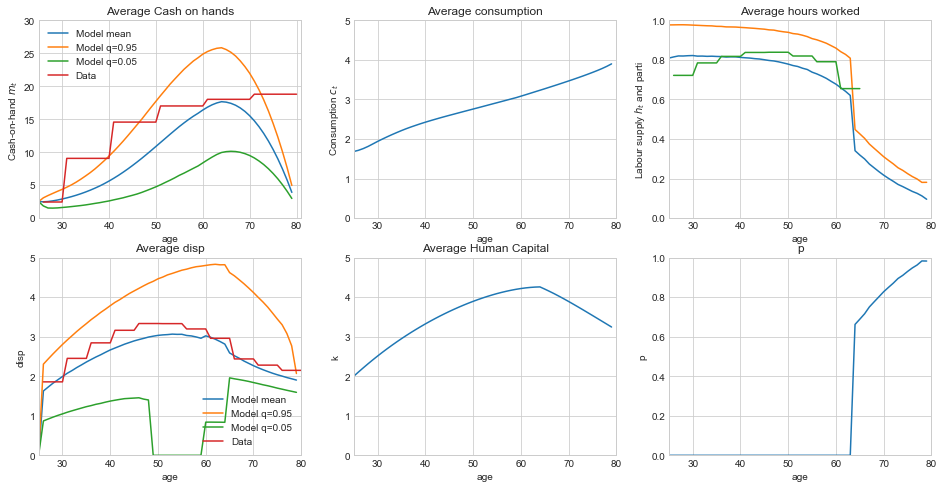

In [11]:
#constructing a dashboard for parameter tuning:
#sigma_epsilon = [0.3]
sigma_w = [0.100]
#To = [35,37]
#kappa = [0.4]

for i,val in enumerate(sigma_w):
    t0 = time.time()
    model = model_dc_multidim()
    model.setup()
    model.par.To = 35
    #model.par.r = 0
    #model.par.beta = 1
    model.par.sigma_w = val
    model.par.phi3 = 0.97
    model.par.rho = 0.2
    model.par.P = 1.2
    model.par.b = 2
    model.par.k_start = 2
    model.par.m_start = 2.5
    model.create_grids()
    model.solve()
    model.simulate()
    #print(f'To = {val} dvs {val+25}år')
    print(f'sigma_w = {val:.3}')
    t1 = time.time() # set the ending time
    print(f'time: {t1-t0:.8} seconds') # print the total time
    figure_dashboard(model.par,model.sim)

In [5]:
## Figure 
shape = (model.par.simT, model.par.simN)
notworking = np.zeros(shape)
parttime = notworking + 0.5
fulltime = notworking + 1

shape2 = (model.par.simT, 1)
nw = np.nan + np.zeros(shape2)
pt = np.nan + np.zeros(shape2)
ft = np.nan + np.zeros(shape2)

for t in range(model.par.simT):
    nw[t] = np.mean(model.sim.h[t] == notworking[t])
    pt[t] = np.mean(model.sim.h[t] == parttime[t])
    ft[t] = np.mean(model.sim.h[t] == fulltime[t])
    
    
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(model.par.simT)+25,nw, label='h=0')
ax.plot(np.arange(model.par.simT)+25,pt, label='h=0-5')
ax.plot(np.arange(model.par.simT)+25,ft, label='h=1')
ax.set_xlabel(f"age")
ax.set_ylabel(f"Percentage of simulated individuals")
ax.set_title(f'Woking hour choice')
plt.legend()
plt.show()

NameError: name 'model' is not defined

In [9]:
def figure_dashboard4(par,sim):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(2,2,1)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.m,1), label='Model mean')
    ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.m,0.90, axis=1), 'r--' , alpha =0.4, label='Model q=0.90')
    ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.m,0.10, axis=1), 'r--' , alpha =0.4, label='Model q=0.10')
    ax.plot(t_m,Data_cash, label='Data', )
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Cash-on-hand $m_t$")
    ax.set_xlim([25,81])
    ax.set_ylim([0,35])
    ax.legend()
    ax.set_title(f'Average Cash on hands')

    ax = fig.add_subplot(2,2,2)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.c,1), label='Model Mean')
    ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.c,0.90, axis=1), 'r--' , alpha =0.4, label='Model q=0.90')
    ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.c,0.10, axis=1), 'r--' , alpha =0.4, label='Model q=0.10')
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Consumption $c_t$")
    ax.set_xlim([25,80])
    ax.set_ylim([0,6])
    ax.legend()
    ax.set_title(f'Average consumption')

    ax = fig.add_subplot(2,2,3)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.h,1))
    ax.plot(t_h,Data_h)
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Labour supply $h_t$ and parti")
    ax.set_xlim([25,80])
    ax.set_ylim([0,1])
    ax.legend()
    ax.set_title(f'Average hours worked')

    ax = fig.add_subplot(2,2,4)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.disp,1), label='Model mean')
    ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.disp,0.90, axis=1), 'r--' , alpha =0.4, label='Model q=0.90')
    ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.disp,0.10, axis=1), 'r--' , alpha =0.4, label='Model q=0.10')
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"disp")
    ax.plot(t_w,Data_disp, label = 'Data')
    ax.set_xlim([25,80])
    ax.set_ylim([0,6])
    ax.legend()
    ax.set_title(f'Average disp')
    plt.show()
    #plt.savefig('pic1.png')

sigma_epsilon = 0.3
time: 259.86716 seconds
No handles with labels found to put in legend.


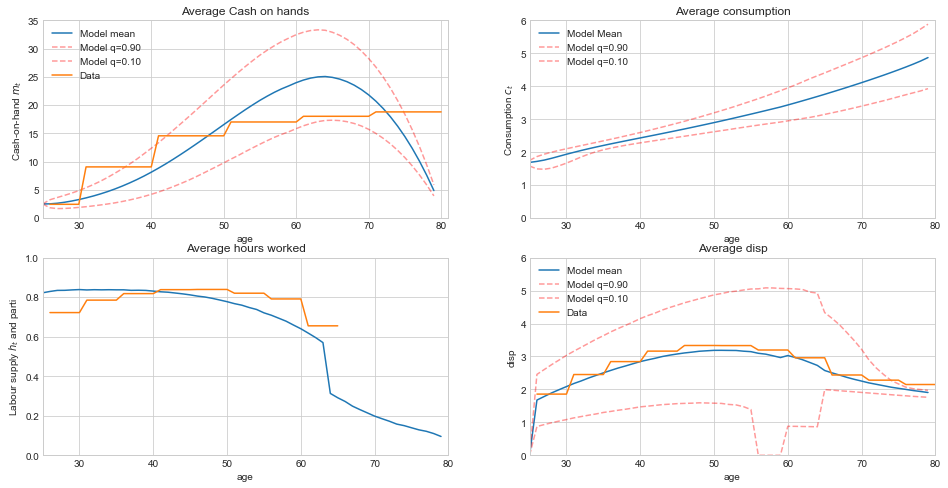

In [11]:
#constructing a dashboard for parameter tuning:
#sigma_w = [0.20000]
sigma_epsilon = [0.300]
#To = [35,37]
#kappa = [0.4]

for i,val in enumerate(sigma_epsilon):
    t0 = time.time()
    model = model_dc_multidim()
    model.setup()
    model.par.To = 35
    model.par.r = 0.045
    #model.par.beta = 1
    
    model.par.sigma_epsilon = val
    model.par.sigma_w = 0.2
    model.par.rho = 0.2
    model.par.P = 1.2
    model.par.b = 2
    model.par.k_start = 2
    model.par.m_start = 2.5
    model.create_grids()
    model.solve()
    model.simulate()
    #print(f'To = {val} dvs {val+25}år')
    print(f'sigma_epsilon = {val:.3}')
    t1 = time.time() # set the ending time
    print(f'time: {t1-t0:.8} seconds') # print the total time
    figure_dashboard4(model.par,model.sim)